1.Introduction

# Video Game Sales Data Analysis
This project aims to analyze the Video Game Sales dataset to gain insights into the video game industry, including popular genres, platforms, sales trends, and regional preferences.


2. Data Loading and Overview


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./vgsales.csv')

# Display the first few rows of the dataset
df.head()


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_21232\1728616431.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


3. Data Cleaning


In [4]:
# Check for missing values
df.isnull().sum()

# Fill missing values (if any)
df['Publisher'].fillna('Unknown', inplace=True)

# Drop unnecessary columns
df = df.drop(columns=['Rank'])

# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Display the cleaned dataset
df.head()


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_21232\3802007496.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


4. Exploratory Data Analysis (EDA)


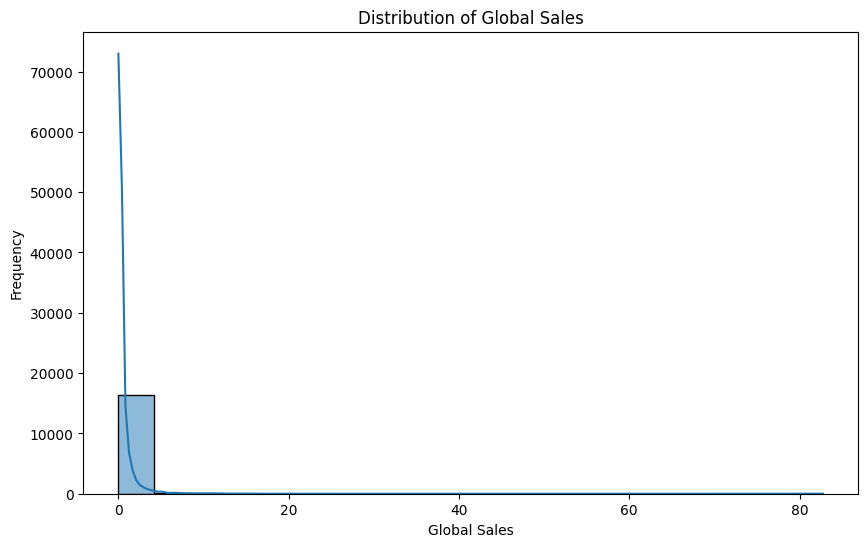

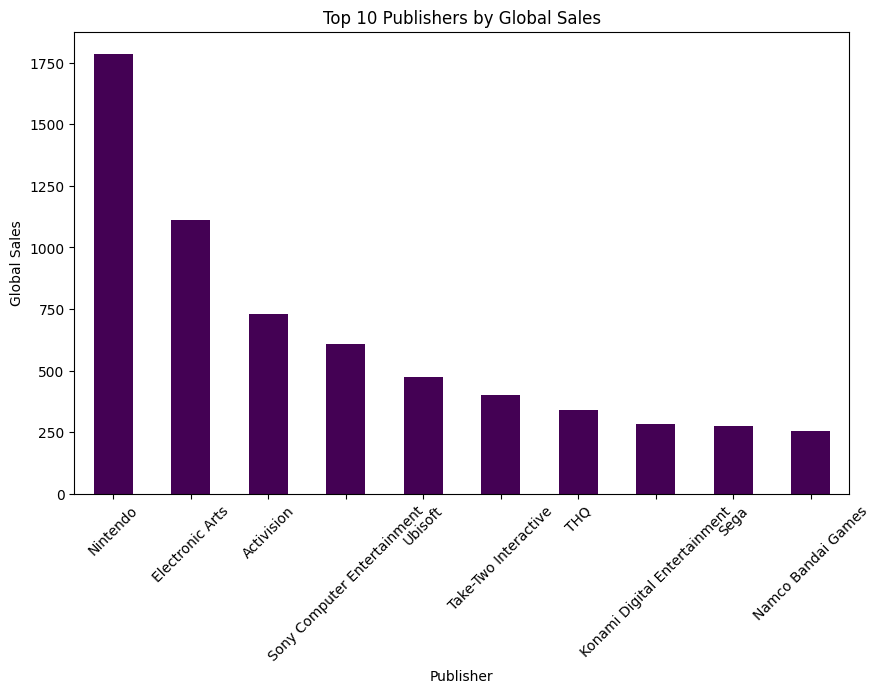

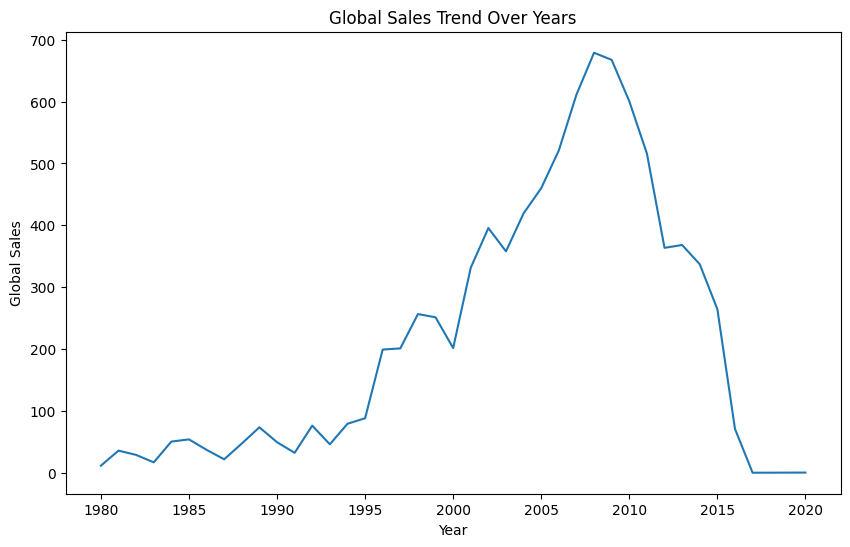

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Global Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=20, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

# Top 10 Publishers by Global Sales
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', colormap='viridis')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

# Sales trends over years
plt.figure(figsize=(10, 6))
sales_trend = df.groupby(df['Year'].dt.year)['Global_Sales'].sum()
sns.lineplot(x=sales_trend.index, y=sales_trend.values)
plt.title('Global Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()


5. Visualization and Insights


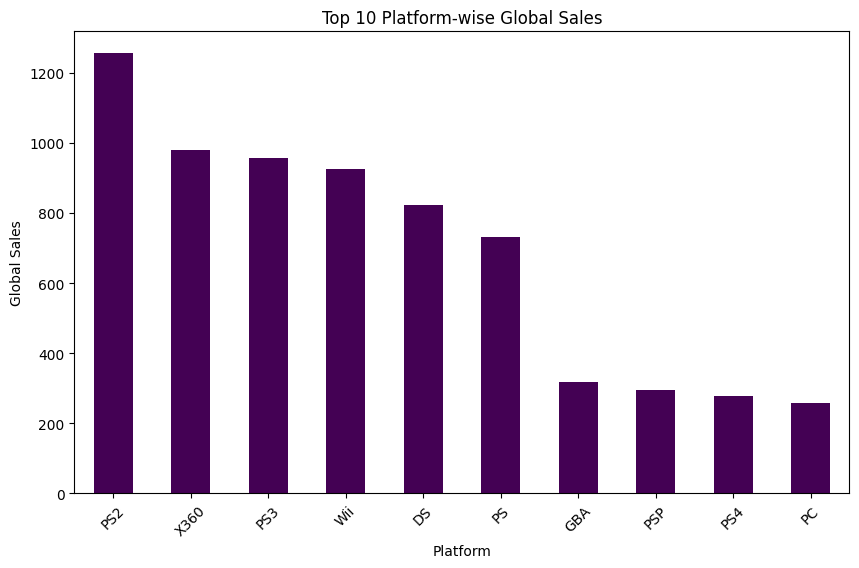

In [6]:


# Platform-wise Sales
plt.figure(figsize=(10, 6))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
platform_sales.plot(kind='bar', colormap='viridis')
plt.title('Top 10 Platform-wise Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()


6. Visualization: Horizontal Bar Chart - Genre-wise Global Sales

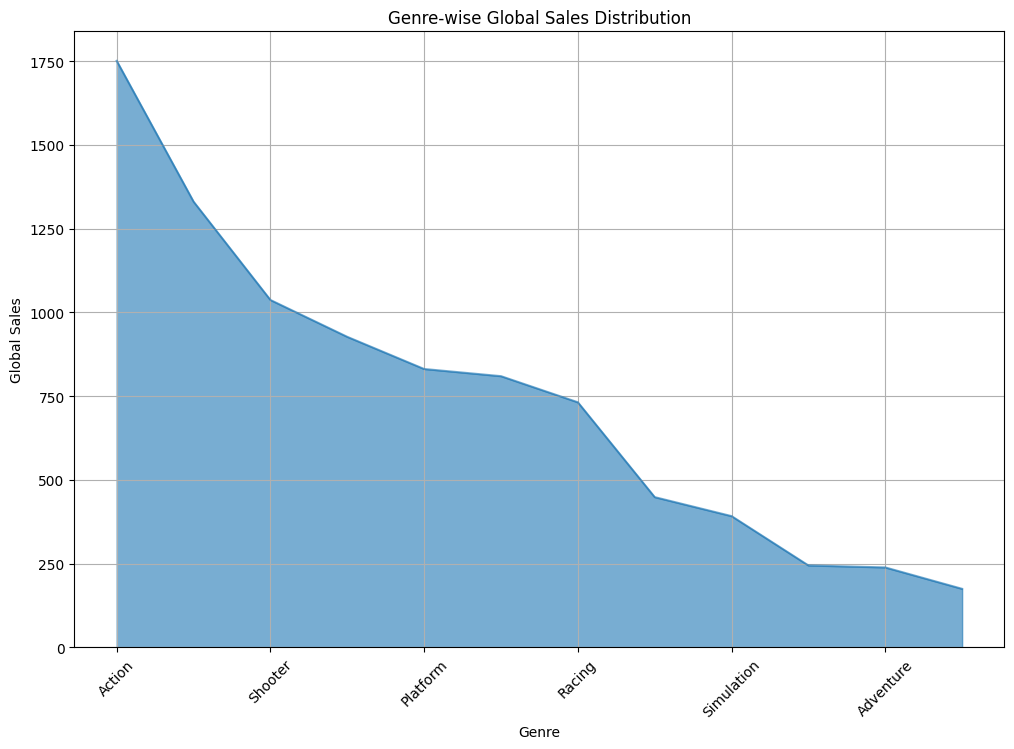

In [7]:
# Group by Genre and sum the global sales
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Plotting an area chart
plt.figure(figsize=(12, 8))
genre_sales.plot(kind='area', colormap='tab20', alpha=0.6)
plt.title('Genre-wise Global Sales Distribution')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

7. Conclusion


# Conclusion
In this project, we analyzed the Video Game Sales dataset to gain insights into the video game industry. We performed data cleaning and explored various aspects such as global sales distribution, top publishers, sales trends over years, genre-wise sales, and platform-wise sales. The analysis provides valuable insights into the gaming market trends and preferences.
